In [1]:
# LOGISTIC REGRESSION 
# Supervised Learning 
# Not for regression used for classification
# Feature scaling is not required 
# We use hyperparameter C


# The logit function is defined as the logarithm of the odds (i.e,  𝑝/(1−𝑝) ), which is also known as the log-odds. Thus, the logit function can be written for a probability of success  𝑝 :
# logit(𝑝)=log(𝑝1−𝑝)  where  0≤𝑝≤1 .
# We can invert this relationship to obtain the logistic function, which for a parameter  𝛼  is defined by the following expression:
# logit−1(𝛼)=logistic(𝛼)=11+exp(−𝛼)

In [2]:
# Set up Notebook

%matplotlib inline

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

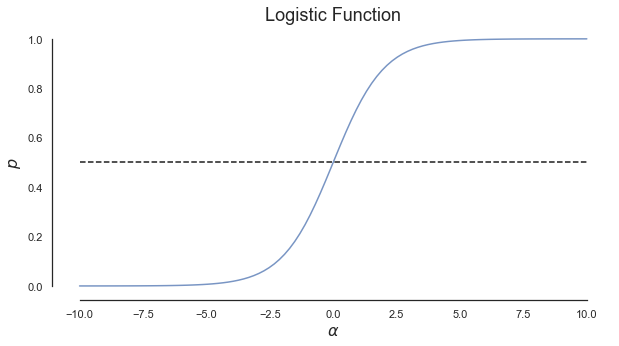

In [3]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Compute and plot logistic function
x = np.linspace(-10, 10, 100)
y = 1. / (1 + np.exp(-x))
ax.plot(x, y, alpha=0.75)

# Draw probability barrier
ax.hlines(0.5, -10, 10, linestyles='--')

# Decorate plot
ax.set_xlabel(r'$\alpha$', fontsize=16)
ax.set_ylabel(r'$p$', fontsize=16)
ax.set_title('Logistic Function', fontsize=18)
sns.despine(offset = 2, trim=True)

In [4]:
df = pd.read_csv('C:/Users/Palla Anuraag Sharma/Downloads/Datacamp/Datasets/Adult Income Dataset/adult.csv')

In [5]:
df.sample(5,random_state=45)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
39849,41,Private,40151,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,>50K
34599,43,Self-emp-inc,247981,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,5455,0,50,United-States,<=50K
46313,24,Private,214542,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,60,Canada,<=50K
1634,32,Local-gov,210448,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,White,Male,0,0,40,United-States,<=50K
37391,54,Self-emp-not-inc,226735,HS-grad,9,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,45,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df['label'] = df['income'].map(lambda x: 1 if x=='>50K' else 0)
df.sample(5,random_state=45)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,label
39849,41,Private,40151,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,>50K,1
34599,43,Self-emp-inc,247981,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,5455,0,50,United-States,<=50K,0
46313,24,Private,214542,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,60,Canada,<=50K,0
1634,32,Local-gov,210448,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,White,Male,0,0,40,United-States,<=50K,0
37391,54,Self-emp-not-inc,226735,HS-grad,9,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,45,United-States,<=50K,0


In [8]:
df.label.value_counts()

0    37155
1    11687
Name: label, dtype: int64

In [9]:
#zero model
zm = float(df.label.value_counts()[0]/(df.label.value_counts()[0]+df.label.value_counts()[1]))
print(f'Zero Model Performance = {100.0 * zm:4.1f}%')

Zero Model Performance = 76.1%


In [10]:
df.rename(columns={'capital-gain':'capital_gain','hours-per-week':'hours_per_week'},inplace=True)

In [11]:
import patsy as pts 

y,x = pts.dmatrices('label ~ age + hours_per_week + capital_gain + gender',data= df, return_type='dataframe')

In [12]:
y.sample(5,random_state=34)

,label
31318,1.0
29048,0.0
42041,1.0
48429,0.0
44333,0.0


In [13]:
x.sample(5,random_state=34)

,Intercept,gender[T.Male],age,hours_per_week,capital_gain
31318,1.0,0.0,46.0,60.0,0.0
29048,1.0,0.0,20.0,20.0,0.0
42041,1.0,1.0,48.0,40.0,8614.0
48429,1.0,1.0,31.0,40.0,0.0
44333,1.0,0.0,28.0,40.0,0.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=35)

In [17]:
y_test.sample()

,label
41025,1.0


In [15]:
adult_model = LogisticRegression(C=1E6)
adult_model = adult_model.fit(x_train, y_train)

In [16]:
from sklearn import metrics 

predicted = adult_model.predict(x_test)
score = 100 * metrics.accuracy_score(y_test,predicted)
print(f'Logistic Regression [Adult Data] Score = {score:4.1f}%\n')
print('Classification Report:')
print(metrics.classification_report(y_test, predicted))

Logistic Regression [Adult Data] Score = 79.1%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88     11091
         1.0       0.71      0.24      0.36      3562

    accuracy                           0.79     14653
   macro avg       0.75      0.60      0.62     14653
weighted avg       0.78      0.79      0.75     14653



In [18]:
# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine learning method.

def confusion(test, predict, labels, title='Confusion Matrix'):
    '''
        test: true label of test data, must be one dimensional
        predict: predicted label of test data, must be one dimensional
        labels: list of label names, ie: ['positive', 'negative']
        title: plot title
    '''

    bins = len(labels)
    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=labels, columns=labels )
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")    
    hm.axes.set_title(title, fontsize=20)
    hm.axes.set_xlabel('Predicted', fontsize=18)
    hm.axes.set_ylabel('Actual', fontsize=18)

    return None

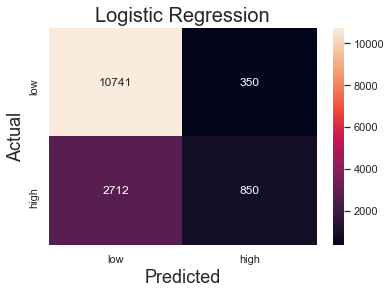

In [20]:
confusion(y_test['label'], predicted, ['low', 'high'], title='Logistic Regression')